Credit [somehats](https://github.com/somehats) for pointing me at this problem

In [2]:
from sympy import *
l, x, y, t = symbols('l x y t')
init_printing()

> Given two lengths $l > m$, describe a curved length $l$ that joins the end points of the straight line segment of length $m$.

Mostly assume $m=1$.

## Parabola

A parabola that passes through points $O=(0,0)$ and $M=(1,0)$ has equation $y=tx(x-1)$

Then the curved length $OM$ is

\begin{aligned}
\int_0^1 \sqrt{1+\left(\dfrac{\text{d}y}{\text{d}x}\right)^2}\text{d}x&=\int \sqrt{1+\left(2tx-t\right)^2} \text{d}x\\
\end{aligned}

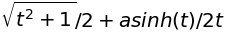

In [10]:
parabola_length = integrate(sqrt(1+(2*t*x-t)**2),(x,0,1))
parabola_length

When $t=1$ for example, this is

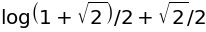

In [15]:
parabola_length.subs(t,1)

Which is roughly

In [16]:
N(_)

Suppose $l=2$. We want

In [11]:
solve(parabola_length-2,t)

NotImplementedError: multiple generators [t, asinh(t), sqrt(t**2 + 1)]
No algorithms are implemented to solve equation sqrt(t**2 + 1)/2 - 2 + asinh(t)/(2*t)

## Circular arc

We need $m=r\sin{\theta}$ and $l=2r\theta$, some radius $r$ and angle $\theta$

So $l=\dfrac{2m\theta}{\sin{\theta}}$

Suppose again that $m=1$ and $l=2$

Then $\theta=\sin{\theta}$

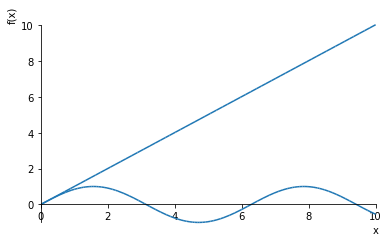

In [3]:
plot(x,sin(x),(x,0,10));

Never going to happen for $\theta\neq 0$

What about $m=1$ and $l=4$?

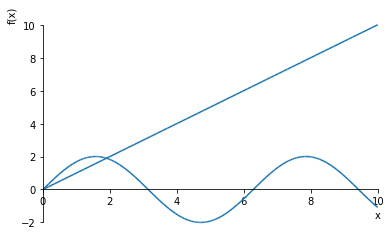

In [5]:
plot(x,2*sin(x),(x,0,10));

More promising...

In [6]:
solve(2*sin(x)-x)

NotImplementedError: multiple generators [x, sin(x)]
No algorithms are implemented to solve equation -x + 2*sin(x)

## Catenary

What about finding a function for which the arc length is an easier integral?

We want $1+\left(f'(x)\right)^2=\left(g(x)\right)^2$

$1+\sinh^2{x}=\cosh^2{x}$ and $\dfrac{\text{d}}{\text{d}x}\cosh{x}=\sinh{x}$

So if $y=\cosh{x}$ then the curved length is $\int_0^1 \cosh{x} \text{d}x=\sinh{1}-\sinh{0}=\dfrac{e^2-1}{2e}$

**But** $\cosh{1}\neq 0$ and $\cosh{0}=1$

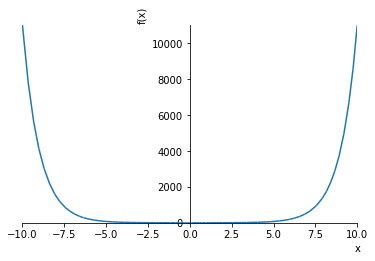

In [5]:
plot(cosh(x));

Try $\int_{-1}^1 \cosh{x} \text{d}x=\sinh{1}-\sinh{(-1)}= \dfrac{e^2-1}{2e}-\dfrac{1-e^2}{2e}=\dfrac{e^2-1}{e}$

In [6]:
sinh(x)-sinh(-x)

So if we set $m=2\ln{2}$, then $\int_{-\ln{2}}^{\ln{2}} \cosh{x} \text{d}x=2\sinh{(\ln{2})}$

In [9]:
N(2*sinh(log(2)))

So we can have $l=1.5$ if $m=$

In [10]:
N(2*ln(2))

So it doesn't look as if we're going to get a nice rational answer this way.

How about some kind of iterative approximation, like with polygons.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn')

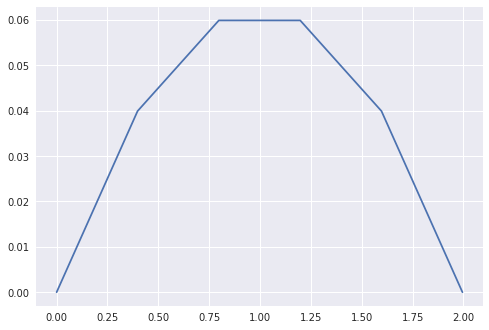

In [22]:
def rotate(u, v ,a):
    c = np.cos(a)
    s = np.sin(a)
    return (c*u-s*v,s*u+c*v)

def poly(a, n, ll):
    h = ll/n
    xs = [0]
    ys = [0]
    
    u, v = h, 0
    u, v = rotate(u, v, a)
    xs.append(u)
    ys.append(v)    
   
    b = 2*a/(n-1)
    for _ in range(n-1):
        u, v = rotate(u, v, -b)
        xs.append(xs[-1]+u)
        ys.append(ys[-1]+v)
        
    return xs,ys
xs, ys = poly(0.1,5,2)
plt.plot(xs,ys)

I give up for now.